# Lambda_b Reconstruction

Using the updated repo, simple starter file, and analysis template, add the 4-vectors of the proton, kaon, and two muons, and see if it gives the mass of the Lambda_b

* Write a function that takes in a list of 4 vectors (of arbitrary length) and adds them together. 

* Histogram $\cos(\theta)$ of the momentum for the Lambda_b
* Histogram the p_mag (magnitude of the momentum) of the Lambda_b
* Histogram the p_mag (magnitude of the momentum) of the 3 final state particles (muons, kaons, protons)


$$\Lambda_b^0 \rightarrow J/\psi  K^-  p$$

$$\Lambda_b^0 \rightarrow \mu^+ \mu^- K^- p$$

$\Lambda_b^0$ - is a hadron, but more specifically a baryon
* Mass = 5.620 GeV
* Composition = up + down + bottom quark

$J/\psi$ - J/psi meson or psion
* Mass = 3.096 GeV
* Composition = charm + anti-charm quark
* Decays into $\mu^+$ and $\mu^-$
    * $\mu^-$ is a pion or pi meson
        * Mass = 0.105658 GeV
        * Composition = down + anti-up quark
    * $\mu^+$ is an antimuon
        * Mass = 0.105658 GeV
        * Composition = up + anti-down quark


$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$p$ is a hadron, but more specifically a baryon composed of three quarks
* Mass = 0.93827 GeV
* Composition = 2 up + 1 down quark

Dalitz Plot
* x-axis is square of m1 + m2
* y-axis is square of m2 + m2 or 2*m2

In [1]:
import lhcb_tools as lhcb
import lichen.lichen as lch
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from math import sqrt
def mass(p4):
    E,px,py,pz = p4[0:4]
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

collision count:  0
collision count:  1000


<IPython.core.display.Javascript object>


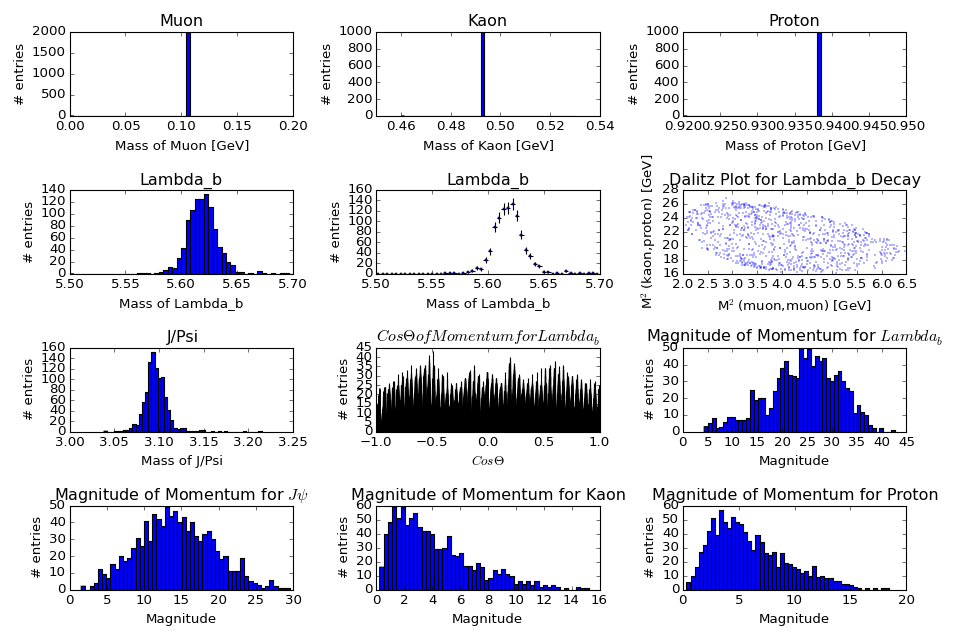

In [12]:
#infile = open("ToyMC_LHCb_BtoJpsiKp_1k.dat",'r')
infile = open("ToyMC_LHCb_BtoJpsiKp_5MeV_resolution.dat")

collisions = lhcb.get_collisions(infile,True)

nmuons = []
muon_mass = []
j_psi_mass = []

nkaons = []
kaons_mass = []

nprotons = []
proton_mass = []

lambda_b_mass = []
z_momentums = []
momentums = []
cos_theta = []

x_values = []
y_values = []

lb_pmag = []
jpsi_pmag = []
kaon_pmag = []
proton_pmag = []

for collision in collisions:

    pions,kaons,protons,muons,electrons,photons = collision
    
    nmuon = len(muons)
    nmuons.append(nmuon)
    #print nmuon
    
    nkaon = len(kaons)
    nkaons.append(nkaon)
    
    nproton = len(protons)
    nprotons.append(nproton)
    
    
# Nmuon is always going to be 2 because we are looking at a lambda_b decay which has a j/psi 
# J/psi decays into muon and antimuon


    for i in range(0,nmuon):
        p40 = muons[i][0:4]
        q0 = muons[i][4]
        m1 = mass(p40)
        muon_mass.append(m1)
        
        for j in range(i+1,nmuon):
            p41 = muons[j][0:4]
            q1 = muons[j][4]
            jpsip4 = add_4_vecs([p40,p41])
            m2 = mass(jpsip4)
            j_psi_mass.append(m2)
            jpsipmag = sqrt(jpsip4[1]*jpsip4[1] + jpsip4[2]*jpsip4[2] + jpsip4[3]*jpsip4[3])
            jpsi_pmag.append(jpsipmag)

            for k in range(0,nkaon):
                p42 = kaons[k][0:4]
                q2 = kaons[k][4]
                kaonp4 = add_4_vecs([p42])
                m3 = mass(p42)
                kaons_mass.append(m3)
                kaonpmag = sqrt(kaonp4[1]*kaonp4[1] + kaonp4[2]*kaonp4[2] + kaonp4[3]*kaonp4[3])
                kaon_pmag.append(kaonpmag)
                
                for l in range(0,nproton):
                    p43 = protons[l][0:4]
                    q3 = protons[l][4]
                    protonp4 = add_4_vecs([p43])
                    m4 = mass(p43)
                    proton_mass.append(m4)
                    protonpmag = sqrt(protonp4[1]*protonp4[1] + protonp4[2]*protonp4[2] + protonp4[3]*protonp4[3])
                    proton_pmag.append(protonpmag)
                
                    if q0 == -q1 and q2 == -1 and q3 == 1:
                        lbp4 = add_4_vecs([p40,p41,p42,p43])
                        m = mass(lbp4)
                        lambda_b_mass.append(m)
                        z_momentums.append(lbp4[3])
                        lambdabpmag = np.sqrt(lbp4[1]*lbp4[1] + lbp4[2]*lbp4[2] + lbp4[3]*lbp4[3])
                        cos = z_momentums/lambdabpmag
                        cos_theta.append(cos)
                        momentums.append(lbp4)
                        lb_pmag.append(lambdabpmag)

                # Dalitz Plot
                
                    p4x = add_4_vecs([p40,p41,p43])
                    
                    y = mass(p4x)
                    y *= y
                    
                    p4y = add_4_vecs([p42,p43])
        
                    x = mass(p4y)
                    x *= x
    
                    x_values.append(x)
                    y_values.append(y) 
                        
                    
plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
plt.hist(muon_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')
plt.title('Muon')

plt.subplot(4,3,2)
plt.hist(kaons_mass,bins=50,range=(0.46,0.53))
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title('Kaon')

plt.subplot(4,3,3)
plt.hist(proton_mass,bins=50,range=(0.92,0.95))
plt.xlabel('Mass of Proton [GeV]')
plt.ylabel('# entries')
plt.title('Proton')

plt.subplot(4,3,4)
plt.hist(lambda_b_mass,bins=50,range=(5.5,5.7))
plt.xlabel('Mass of Lambda_b')
plt.ylabel('# entries')
plt.title('Lambda_b')

plt.subplot(4,3,5)
lch.hist_err(lambda_b_mass,bins=50,range=(5.5,5.7))
plt.xlabel('Mass of Lambda_b')
plt.ylabel('# entries')
plt.title('Lambda_b')

plt.subplot(4,3,6)
plt.plot(x_values,y_values,'b.',alpha=1.0,markersize=1) # Alpha is transparency
plt.xlabel(r"M$^2$(muon,muon) [GeV]")
plt.ylabel(r"M$^2$(kaon,proton) [GeV]")
plt.title("Dalitz Plot for Lambda_b Decay")

plt.subplot(4,3,7)
plt.hist(j_psi_mass,bins=50)
plt.xlabel("Mass of J/Psi")
plt.ylabel("# entries")
plt.title("J/Psi")

plt.subplot(4,3,8)
plt.hist(cos_theta,bins=50,range=(-1,1))
plt.xlabel("$Cos\Theta$")
plt.ylabel("# entries")
plt.title("$Cos\Theta of Momentum for Lambda_b$")

plt.subplot(4,3,9)
plt.hist(lb_pmag,bins=50)
plt.xlabel("Magnitude")
plt.ylabel("# entries")
plt.title("Magnitude of Momentum for $Lambda_b$")

plt.subplot(4,3,10)
plt.hist(jpsi_pmag,bins=50)
plt.xlabel("Magnitude")
plt.ylabel("# entries")
plt.title("Magnitude of Momentum for $J\psi$")

plt.subplot(4,3,11)
plt.hist(kaon_pmag,bins=50)
plt.xlabel("Magnitude")
plt.ylabel("# entries")
plt.title("Magnitude of Momentum for Kaon")

plt.subplot(4,3,12)
plt.hist(proton_pmag,bins=50)
plt.xlabel("Magnitude")
plt.ylabel("# entries")
plt.title("Magnitude of Momentum for Proton")

plt.tight_layout()